> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMBb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Questions for Analysis
1) The most popular genres over the year.

2) The relation between budget, revenue and profit.

3) The relation between profit and runtime.

4) The top 10 directors having highest number of movies.

5) The top 10 directors having the highest profit.

6) The top 10 actor having the highest number of movies.

7) The top 10 actor having the highest profits.

8) The relation between months and the number of movies.

9) The relation between months and the total profit.

10) The relation between seasons and the number of movies.

11) The relation between seasons and the total profit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

### Data loading

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### Data investigation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.shape

(10866, 21)

plotting the missing values

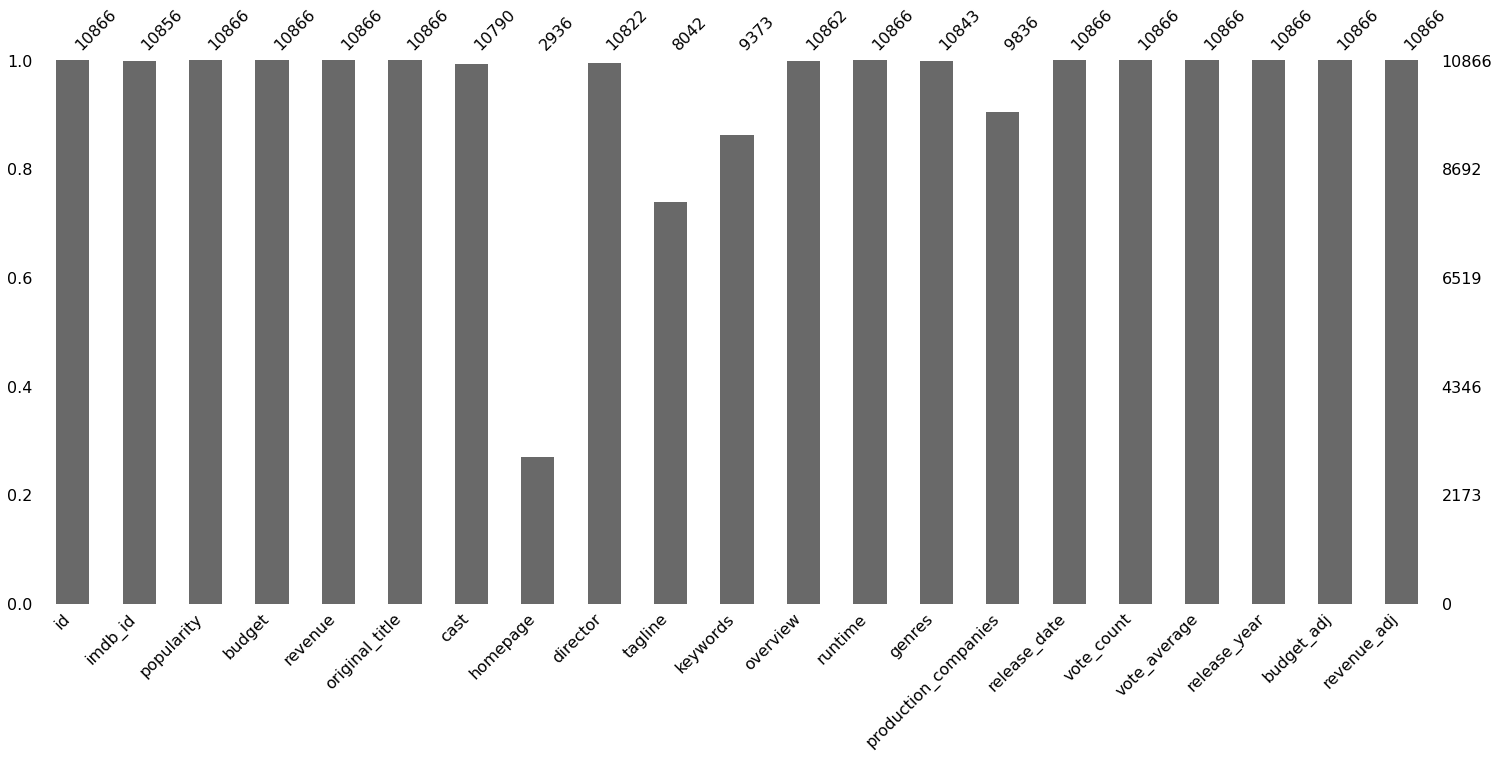

In [6]:
mno.bar(df);


### Data Cleaning

 

Drop rows with duplications and null values

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Dropping columns of no significane to the analysis 

In [9]:
df=df.drop(columns=['homepage','tagline','keywords','production_companies','vote_count'])

In [10]:
df.isna().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [11]:
df = df.dropna(axis=0)
df.isna().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [12]:
df.shape

(10724, 16)

## Exploratory Data Analysis




### Research Question 1 (The most popular genres over the year)

Splitting the genres and plotting aganist years

In [13]:
df_genres = df.copy()

In [14]:
genres = df['genres'].str.split('|').apply(pd.Series, 1).stack()
genres.index = genres.index.droplevel(-1)
genres.name = 'genres'
del df_genres['genres']
df_genres = df_genres.join(genres)
df_genres = df_genres[['release_year','genres']]
df_genres.sample(5)

,release_year,genres
6215,2005,Action
8703,2000,Science Fiction
9301,1989,Crime
9971,1971,Drama
383,2015,Adventure


In [15]:
df_genres=pd.pivot_table(df_genres,  index=['release_year'], columns=['genres'], aggfunc= len,fill_value=0)
df_genres.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,8,5,0,8,2,0,13,3,2,1,5,7,1,0,6,3,0,6,2,6
1961,7,6,1,10,2,0,16,5,2,1,3,3,2,1,7,4,0,0,2,3
1962,8,7,0,5,3,0,21,2,1,1,4,5,1,4,5,2,0,7,3,3
1963,4,7,1,13,4,0,13,3,2,2,4,9,0,6,8,2,0,10,1,2
1964,5,5,2,16,10,0,20,4,4,1,3,6,5,4,9,4,0,9,3,1


Plotting the genres versus release will be difficult to read, so I prefer to plot each genre in one plot.

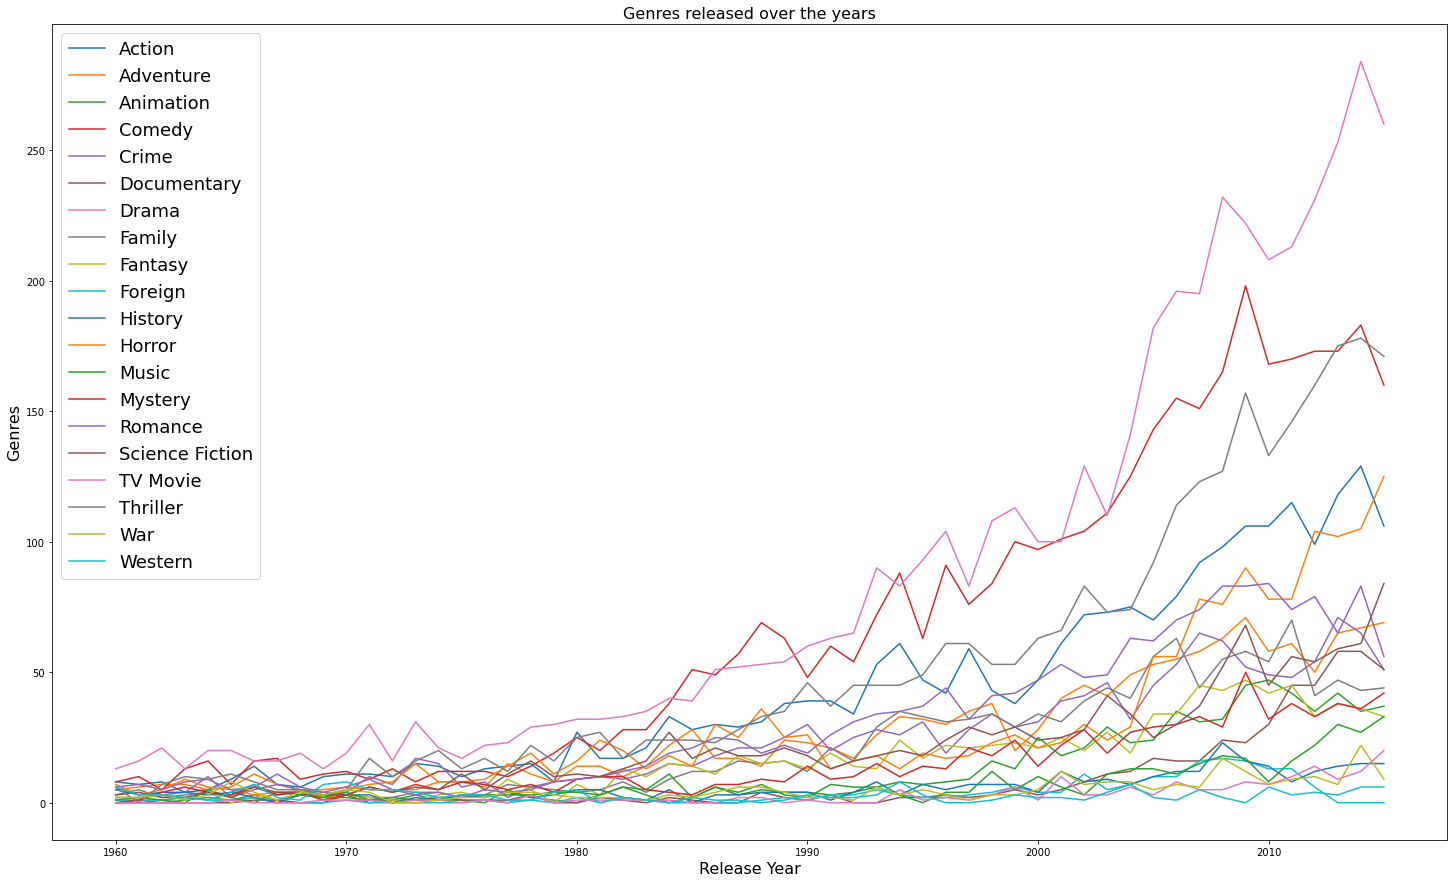

In [16]:
ax = df_genres.plot(kind = 'line', figsize=(25,15), ylabel= 'proportion')
ax.set_xlabel('Release Year', fontsize=16)
ax.set_ylabel('Genres', fontsize=16)
ax.set_title('Genres released over the years', fontsize=16)
plt.legend(prop={'size': 18})
plt.show();

The plot shows the most released genres over the years and the top five genres are Drama, Comedy, Family, Action and Adventure.

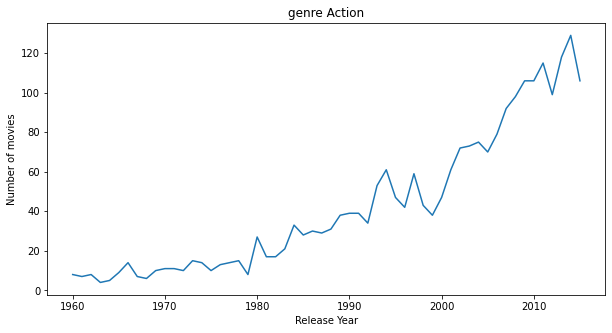

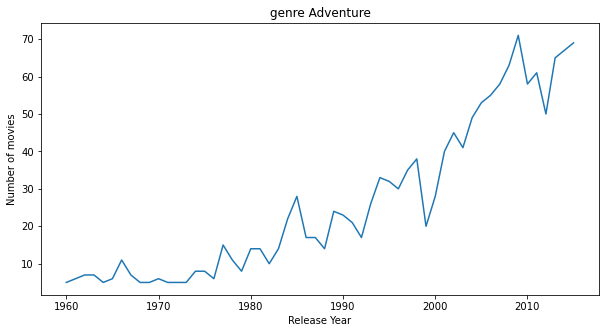

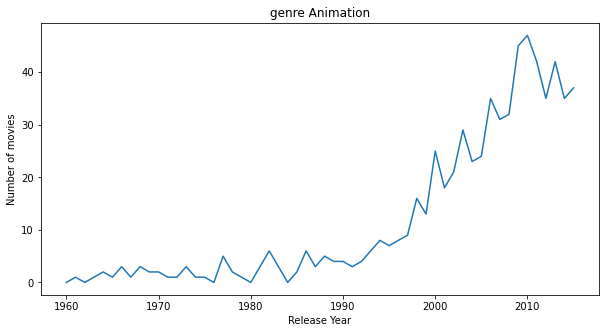

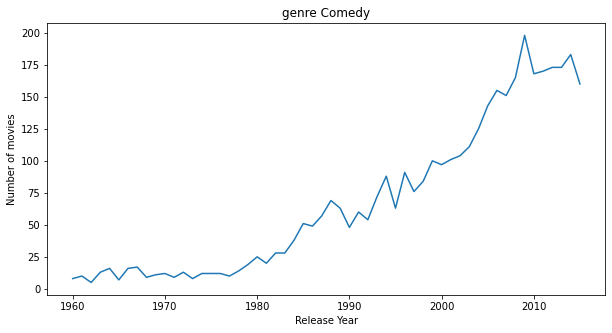

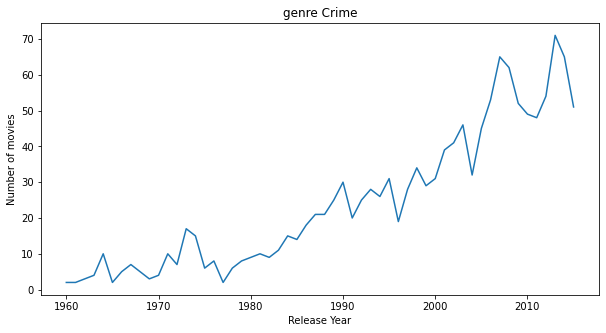

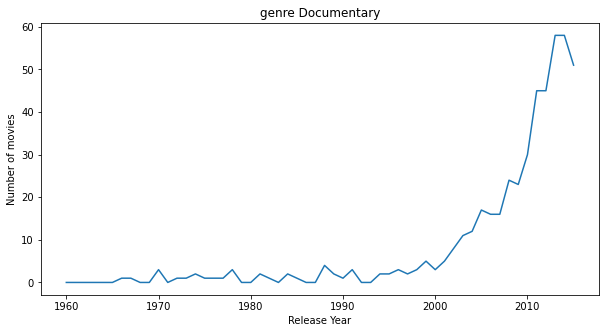

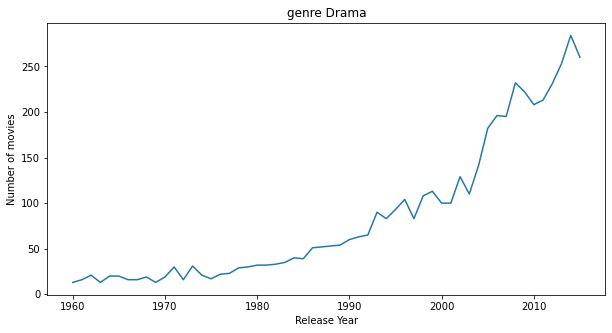

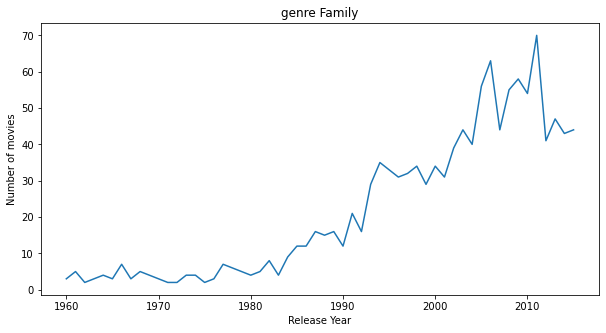

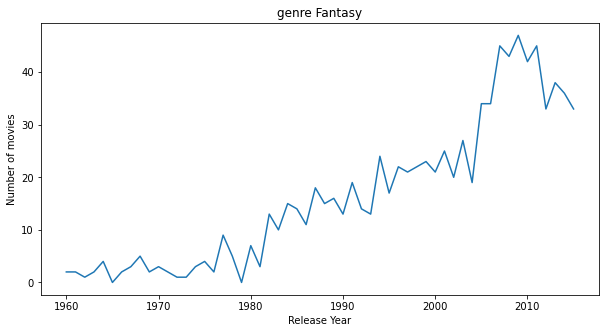

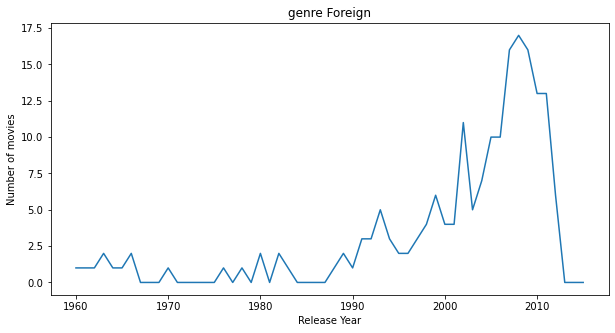

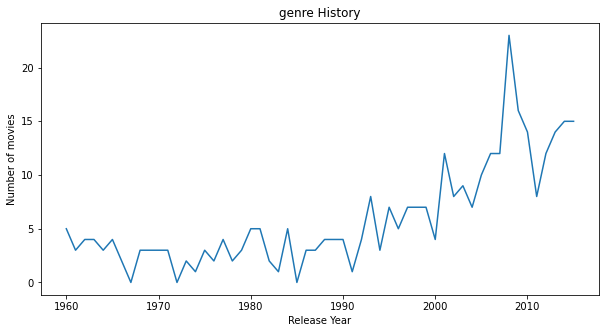

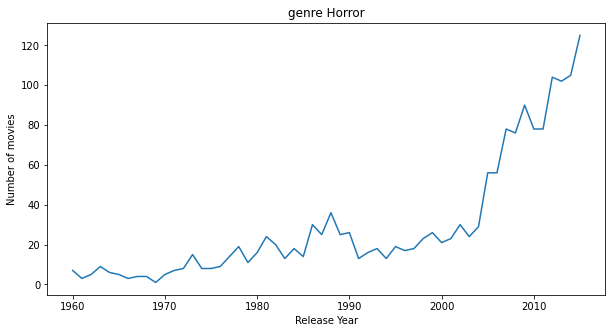

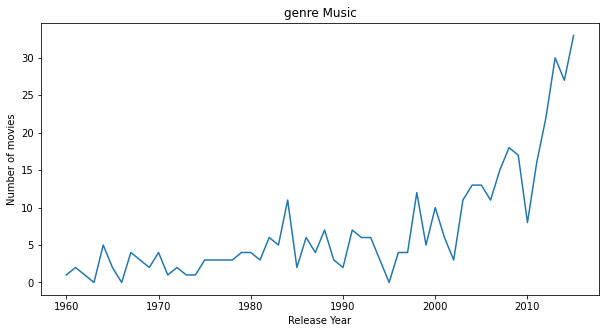

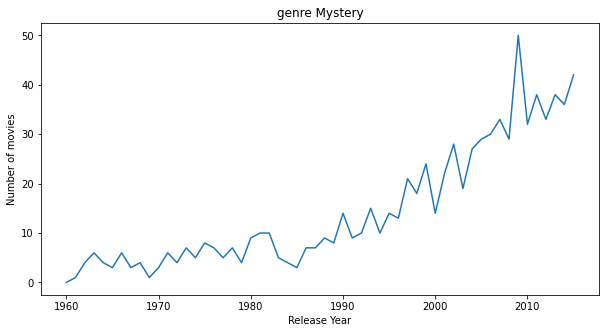

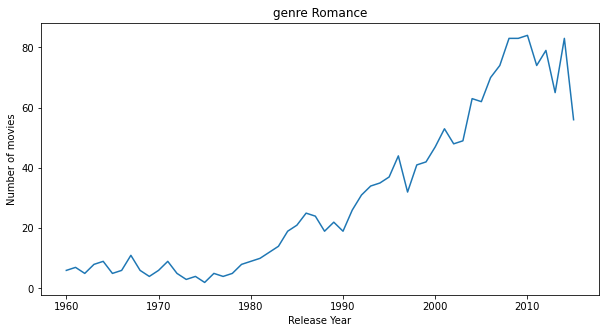

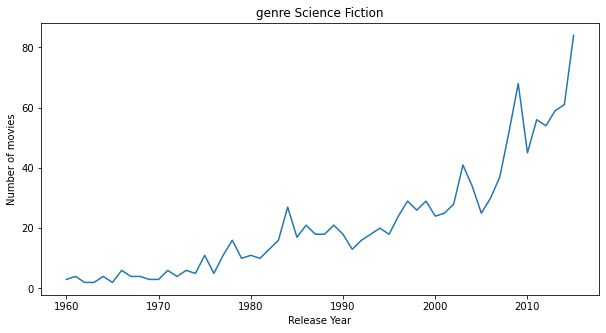

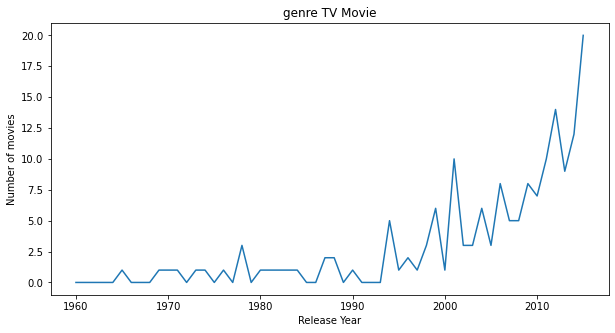

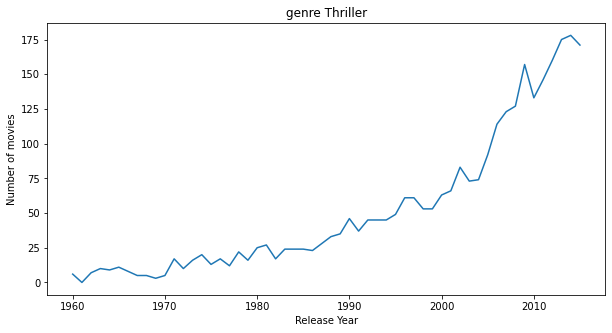

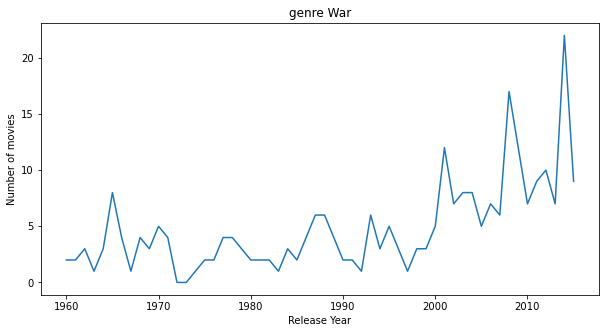

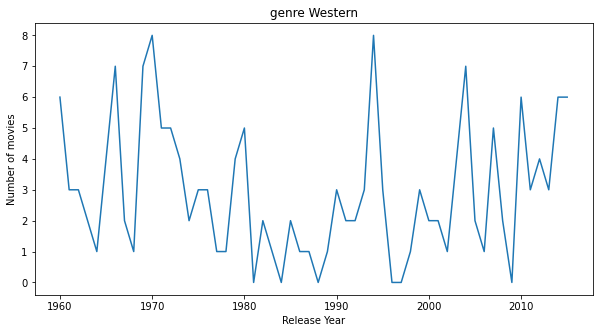

In [17]:
for column in df_genres.columns:
    df_genres[column].plot(title = f"genre {column}",xlabel='Release Year', ylabel = 'Number of movies' , figsize= (10,5))
    plt.show();

The takeaway from these plots to show the trend of each genre and avoid the noise and overlapping of plotting all genres in one plot.

Visualize genres each ten years using stacked horizontal barplot

### Research Question 2  (The relation between budget, revenue and profit)

Creating a new column profit and runtime in hours

In [18]:
df['profit']=df['revenue']-df['budget']
df['runtime_hrs'] = df['runtime'] / 60
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,profit,runtime_hrs
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1363528810,2.066667
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08,228436354,2.000000
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08,185238201,1.983333
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09,1868178225,2.266667
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09,1316249360,2.283333


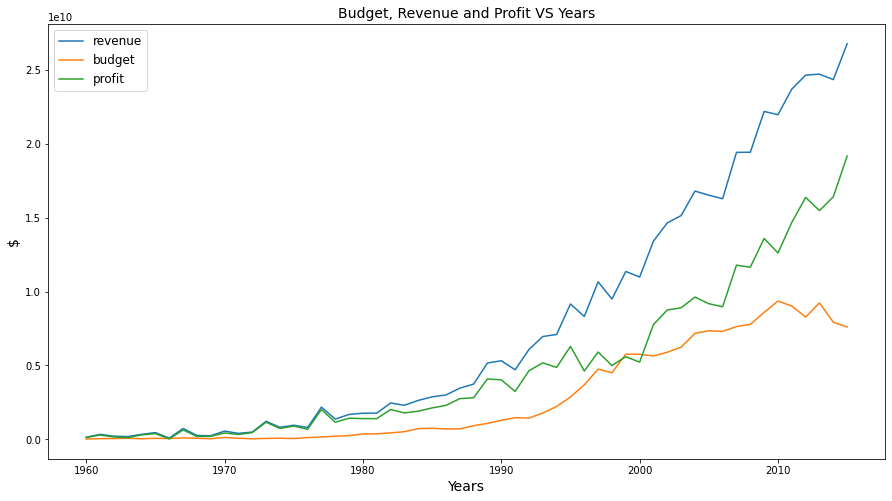

In [19]:
def Plot(*columns):
    for col in columns:
        plt.rc('figure', figsize=(15,8) )
        ax = df.groupby('release_year').sum()[col].plot(kind='line')
        ax.set_xlabel('Years',fontsize=14)
        ax.set_ylabel('$',fontsize=14)
        ax.set_title('Budget, Revenue and Profit VS Years',fontsize=14)
        plt.legend(prop={'size': 12})
    plt.show();
Plot('revenue', 'budget', 'profit')

Revenues show a leap started from 1980 and go on.

### Research Question 3  (The relation between profit and runtime)

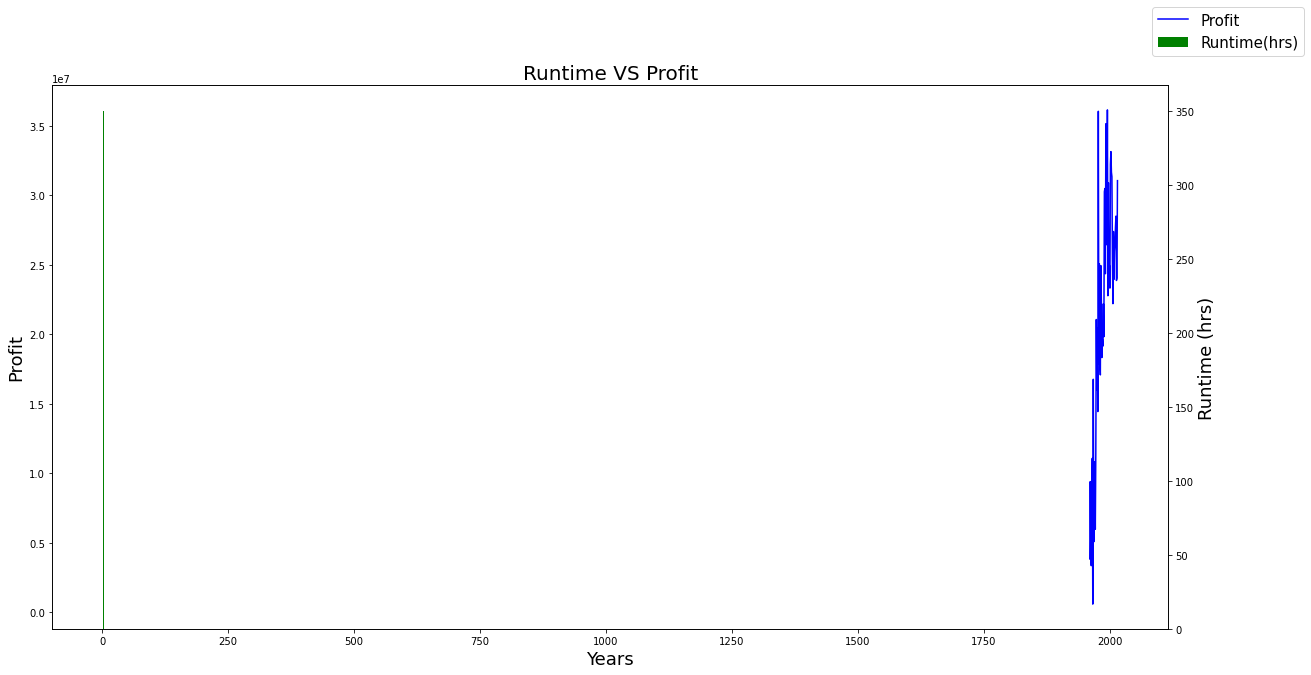

In [23]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
ax1.plot(df.groupby('release_year').mean()['profit'],label='Profit',color='blue')
ax2.bar(df.groupby('release_year').mean()['runtime_hrs'],350 ,label='Runtime(hrs)', color='green')
ax1.set_xlabel("Years", fontsize=18)
ax1.set_ylabel("Profit", fontsize =18)
ax2.set_ylabel("Runtime (hrs)", fontsize=18)
fig.legend(prop={'size': 15})
plt.title('Runtime VS Profit',fontsize=20)
plt.show()

This plot shows the relation between the runtime in hours and the profit, the general trend is pointing to higher profit with less runtime hours.

### Research Question 4  (The top 10 directors having highest number of movies)

In [ ]:
ax = df.groupby('director').count()['id'].sort_values(ascending=False)[0:9].plot(kind='barh',figsize=(10, 5))
ax.set_xlabel('Number of movies',fontsize=14)
ax.set_ylabel('Directors',fontsize=14)
ax.set_title('Directors VS Number of Movies', fontsize=14)
plt.show();

The horizontal bar plot shows the top 10 directors who directed the largest number of movies.

### Research Question 5  (The top 10 directors having the highest profit)

In [ ]:
ax = df.groupby('director').sum()['profit'].sort_values(ascending=False)[0:9].plot(kind='barh',figsize=(10, 5))
ax.set_xlabel('Total Profit',fontsize=14)
ax.set_ylabel('Directors',fontsize=14)
ax.set_title('Directors VS Total Profit', fontsize=14)
plt.show();

Directors achieved highest profits are not found in the Top 10 list in the the figure above (except one) which shows no relation between number of movies and profits.  

### Research Question 6  (The top 10 actor having the highest number of movies)

Creating new column of main actor assuming that the main actor's name comes first in the cast

In [ ]:
df['main_actor'] = df['cast'].str.split('|').str[0]

In [ ]:
ax = df.groupby('main_actor').count()['id'].sort_values(ascending=False)[0:9].plot(kind='barh',figsize=(10, 5))
ax.set_xlabel('Number of movies',fontsize=14)
ax.set_ylabel('Main Actors',fontsize=14)
ax.set_title('Main Actors VS Number of Movies', fontsize=14)
plt.show();

The horizontal bar plot shows the top 10 actors who played the largest number of movies.

### Research Question 7  (The top 10 actor having the highest profits)

In [ ]:
ax = df.groupby('main_actor').sum()['profit'].sort_values(ascending=False)[0:9].plot(kind='barh',figsize=(10, 5))
ax.set_xlabel('Total Profit',fontsize=14)
ax.set_ylabel('Main Actors',fontsize=14)
ax.set_title('Main Actors VS Total Profit', fontsize=14)
plt.show();

Daniel Radcliffe is the highest profits achiever probably because of the Harry Potter series.

### Research Question 8  (The relation between months and the number of movies)

Create two new columns month and month name after changing release date column to datetime format

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
df['month']=df['release_date'].dt.month 

In [ ]:
df['month_name'] = df['release_date'].dt.month_name(locale = 'English')

In [ ]:
ax = df.groupby('month_name').count()['id'].sort_values(ascending=True).plot(kind='barh',figsize=(10, 5))
ax.set_xlabel('Number of movies', fontsize=14)
ax.set_ylabel('Month', fontsize=14)
ax.set_title('Month VS Number of Movies', fontsize=14)
plt.show();

The plot shows that Winter and Autumn months witnessed the highest numbers of released movies.

### Research Question 9  (The relation between months and the total profit.)

In [ ]:
ax = df.groupby('month_name').sum()['profit'].sort_values(ascending=True).plot(kind='barh',figsize=(10, 5))
ax.set_xlabel('Total Profit', fontsize=14)
ax.set_ylabel('Month', fontsize=14)
ax.set_title('Month VS Total Profit', fontsize=14)
plt.show();

Although the September and October are having the highest number of released movies, June is dominating the profits. This can be interpreted as during summer vacation people hit cinemas more frequently than other days.

### Research Question10 (The relation between Seasons and the number of movies)

Creating seasons column by mapping from month column

In [ ]:
mapping = {
    12 : 'Winter',
    1 : 'Winter',
    2 : 'Winter',
    3 : 'Spring',
    4 : 'Spring',
    5 : 'Spring',
    6 : 'Summer',
    7 : 'Summer',
    8 : 'Summer',
    9 : 'Autumn',
    10 : 'Autumn',
    11 : 'Autumn'
}
df['seasons'] = df['month'].map(mapping)

In [ ]:
ax = df.groupby('seasons').count()['id'].sort_values(ascending=True).plot(kind='barh',figsize=(10, 5))
ax.set_xlabel('Number of Movies', fontsize=14)
ax.set_ylabel('Season', fontsize=14)
ax.set_title('Season VS Number of Movies', fontsize=14)
plt.show();

As described in the previous plots Autumn and Winter had the highest numners of released movies.

### Research Question 11 (The relation between Seasons and the total profit.)

In [ ]:
ax = df.groupby('seasons').sum()['profit'].sort_values(ascending=True).plot(kind='barh',figsize=(10, 5))
ax.set_xlabel('Total Profit', fontsize=14)
ax.set_ylabel('Season', fontsize=14)
ax.set_title('Season VS Total Profit', fontsize=14)
plt.show();

This concretes the previous finding, the highest profits are focused in the Summer season.


## Conclusions
1) Drama genre is excelling from 1960 till 2015 although around 1988 comedy genre exceeded.

2) The general trend of genres such as Drama, Comedy, Family, and Action is showing a step increase from 2000 and go on.

3) The profit, revenue, and budget values were the same values till 1975, after that revenues increased and exceeded profits.

4) The runtime vs profit plot shows that the movies that have a runtime of around 110 minutes are making the highest profits, although the general trend is showing that the increase in profit comes with a decrease in the runtime.

5) The plot of the highest number of movie directors and the other plot of profits are showing that profit is not a function of the number of movies same as the actor plots.

6) Although September has the highest number of released movies, June is the most profitable month. This relation is validated more using seasons plots which show that Summer is the highest profit season even though most movies were released in Autumn.

# Limitations

1) The dataset doesn't show whether the movies were played in theatres, videos or online platforms, which makes the driving of any conclusions about the increase of profits very risky and requires drawing a lot of assumptions.

2) The dataset lacks a country column so this would help in the analysis. For example which genre dominates over specific country.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])